### General linear second order differential equations. Boundary value problems



$$
\left\{\begin{array}{l}
\underbrace{a(x) u_{x x}(x)}_{\text {diffusion }}+\underbrace{b(x) u_{x}(x)}_{\text {advection }}+\underbrace{c(x) u(x)}_{\text {growth/decay }}=\underbrace{f(x)}_{\text {source }} x \in ( 0,1) \\
\begin{array}{l}
u(0)=\alpha \\
u(1)=\beta
\end{array}
\end{array}\right\}
$$
Approximation:
$a_{i} \frac{u_{i-1}-2 u_{i}+u_{i+1}}{h^{2}}+b_{i} \frac{u_{i+1}-u_{i-1}}{2 h}+c_{i} u_{i}=f_{i}$ where $a_{i}=a\left(x_{i}\right), b_{i}=b\left(x_{i}\right), c_{i}=c\left(x_{i}\right)$.

We may write it as a linear system $A \cdot \vec{u}=\vec{f}$, where
$$
\begin{aligned}
&\vec{f}=\left(\begin{array}{c}
f_{1}-\left(\frac{a_{1}}{h^{2}}-\frac{b_{1}}{2 h}\right) \alpha \\
f_{2} \\
\vdots \\
f_{n-1} \\
f_{n}-\left(\frac{a_{n}}{h^{2}}+\frac{b_{n}}{2 h}\right) \beta
\end{array}\right)
\end{aligned}
$$
and

$$
A = (1/h^2)\left(\begin{array}{ccccc}
h^{2} c_{1}-2 a_{1} & a_{1}+\frac{h b_{1}}{2} & & &  \\
a_{2}-\frac{h b_{2}}{2} & h^{2} c_{2}-2 a_{2} & a_{2}+\frac{h b_{2}}{2} & &\\
& \ddots & \ddots & \ddots & \\
& & a_{n-1}-\frac{h b_{n-1}}{2} & h^{2} c_{n-1}-2 a_{n-1} & a_{n-1}+\frac{h b_{n-1}}{2} \\
& & & a_{n}-\frac{h b_{n}}{2} & h^{2} c_{n}-2 a_{n}
\end{array}\right)
$$

In [1]:
import numpy as np
from scipy.sparse import spdiags
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [2]:
#Initialize
x = np.linspace(0,1,100)
uLeft = 0
uRight = 0

def a_coef(x):
    return x**2 + 1
def b_coef(x):
    return 2*x
def c_coef(x):
    return  0*x
def f_source(x):
    return np.cos(x)

dx = x[1]-x[0]
nx = len(x)

In [3]:
#Create diagonal matrix
ac = a_coef(x)
bc = b_coef(x)
cc = c_coef(x)
aMat = spdiags([np.roll((ac + dx*bc/2) * 1/dx**2,1),
                (dx**2 * cc - 2* ac) * 1/dx**2,
                np.roll((ac - dx*bc/2) * 1/dx**2, -1)],[1,0,-1],nx,nx)

fs = f_source(x) 
rhs = np.hstack((fs[0] - (ac[0]/dx**2 - bc[0]/(2*dx)) * uLeft,
                fs[1:-1],
                fs[-1] - (ac[-1]/dx**2 - bc[-1]/(2*dx)) * uRight))


u = 0*x
print("The system is solvable:", np.linalg.matrix_rank(aMat.toarray()) == len(u))
u = np.linalg.solve(aMat.toarray(), rhs)

The system is solvable: True


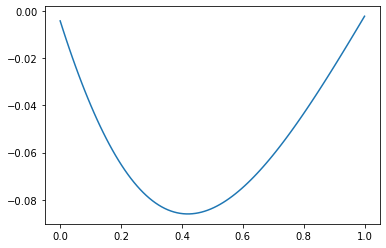

In [4]:
plt.plot(x, u)
plt.show()